In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler,StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, SplineTransformer
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge, Lasso 
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce

from tqdm import tqdm

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [5]:
df_train = pd.read_csv(path_train)
df_train.head()

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864


### EDA

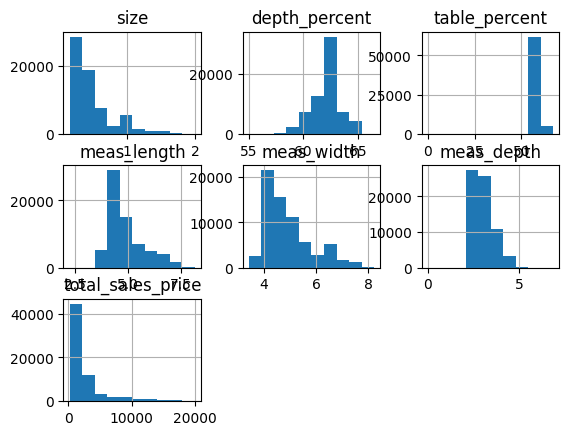

In [6]:
df_train.hist();

In [7]:
df_train.isna().sum()

size                 0
color                0
clarity              0
cut                  0
symmetry             0
polish               0
depth_percent        0
table_percent        0
meas_length          0
meas_width           0
meas_depth           0
total_sales_price    0
dtype: int64

### Проверяем на наличие дупликатов

In [8]:
display(len(df_train) - len(df_train.drop_duplicates()))
df_train.drop_duplicates(inplace=True)
display(len(df_train) - len(df_train.drop_duplicates()))

192

0

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67406 entries, 0 to 67597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   size               67406 non-null  float64
 1   color              67406 non-null  object 
 2   clarity            67406 non-null  object 
 3   cut                67406 non-null  object 
 4   symmetry           67406 non-null  object 
 5   polish             67406 non-null  object 
 6   depth_percent      67406 non-null  float64
 7   table_percent      67406 non-null  float64
 8   meas_length        67406 non-null  float64
 9   meas_width         67406 non-null  float64
 10  meas_depth         67406 non-null  float64
 11  total_sales_price  67406 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 6.7+ MB


In [10]:
df_train.describe()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000,67406.000000
mean,0.504200,62.108139,57.791947,4.911914,4.943721,3.060998,2754.368068
std,0.306289,1.308627,1.852402,0.869308,0.874522,0.545386,3340.749253
min,0.150000,55.000000,0.000000,2.270000,3.420000,0.000000,242.000000
25%,0.300000,61.400000,56.000000,4.290000,4.310000,2.680000,898.000000
50%,0.400000,62.300000,58.000000,4.600000,4.640000,2.880000,1236.000000
75%,0.570000,62.800000,59.000000,5.290000,5.327500,3.290000,3206.000000
max,2.000000,66.500000,67.000000,8.180000,8.230000,6.860000,19996.000000


In [11]:
df_train.shape

(67406, 12)

# -------------

### Working with Outliers

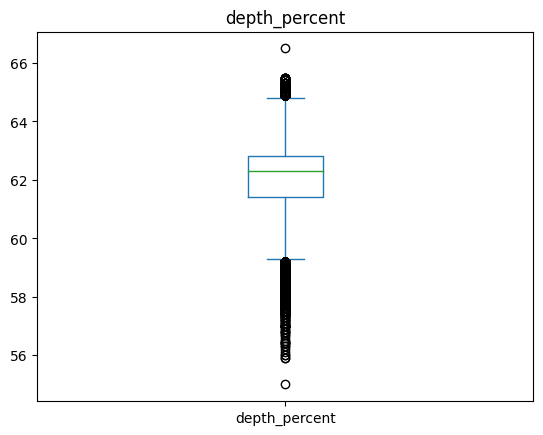

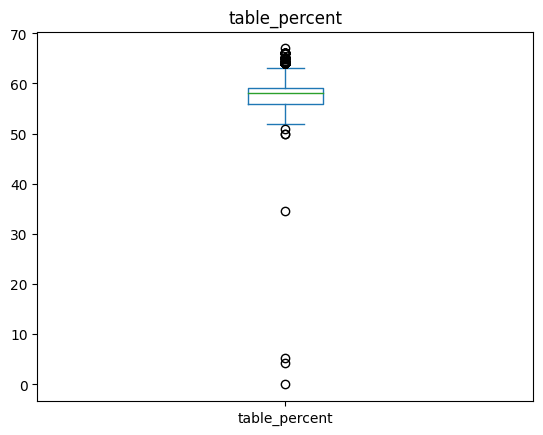

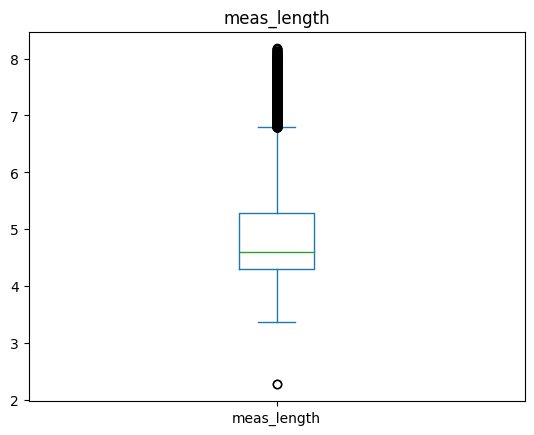

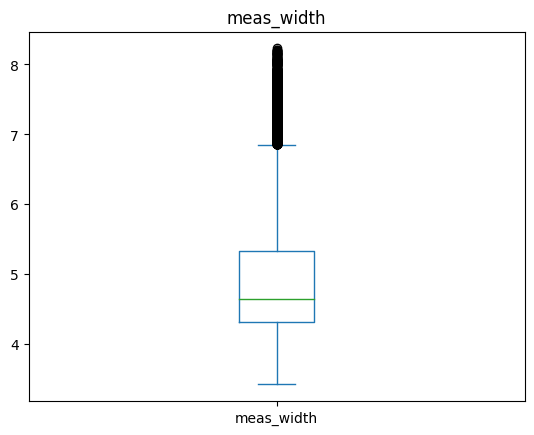

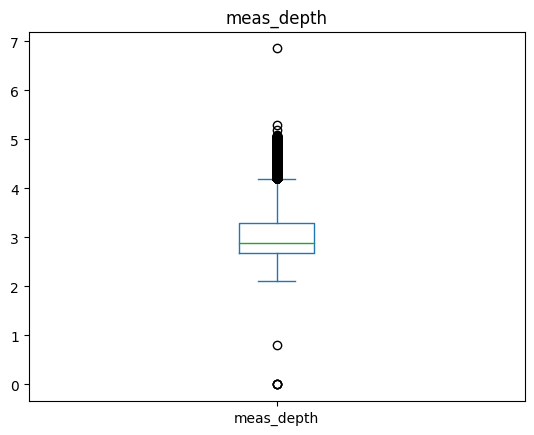

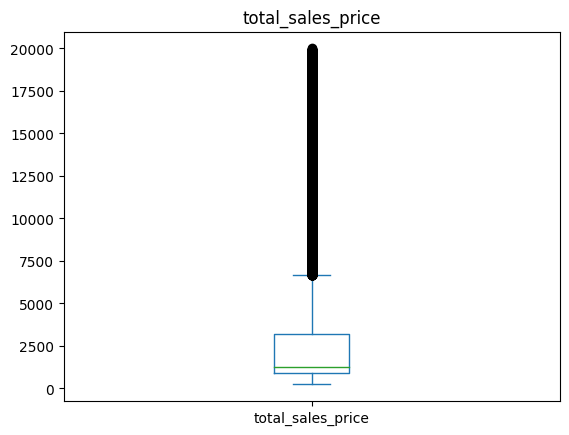

In [12]:
for column in df_train.columns[6:]:
    plt.figure()  # Создаем новое окно для каждого графика
    df_train[column].plot(kind='box', title=column)
    plt.show()

#### В данных действительно есть выбросы, удалим их через квантили

In [13]:
set_index_for_drop = set()
for column in df_train.columns[6:-1]:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    indexes = list(df_train[(df_train[column] < Q1-1.5*IQR ) | (df_train[column] > Q3+1.5*IQR)].index)
    set_index_for_drop.update(indexes)

len(set_index_for_drop)

5460

In [14]:
df_not_outliers = df_train.drop(index=set_index_for_drop).copy()
display(df_not_outliers.head())
display(df_train.shape)
display(df_not_outliers.shape)

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.50,K,SI2,Excellent,Excellent,Excellent,61.4,55.0,5.10,5.12,3.14,990
1,0.50,E,VVS2,Excellent,Excellent,Very Good,61.9,60.0,5.06,5.09,3.14,3384
2,0.35,G,VS2,Excellent,Excellent,Excellent,63.0,55.0,4.47,4.51,2.83,1154
3,0.30,E,SI2,Excellent,Excellent,Excellent,63.2,57.0,4.24,4.27,2.69,886
4,0.30,F,VS2,Very Good,Very Good,Excellent,63.4,61.0,4.24,4.26,2.69,864


(67406, 12)

(61946, 12)

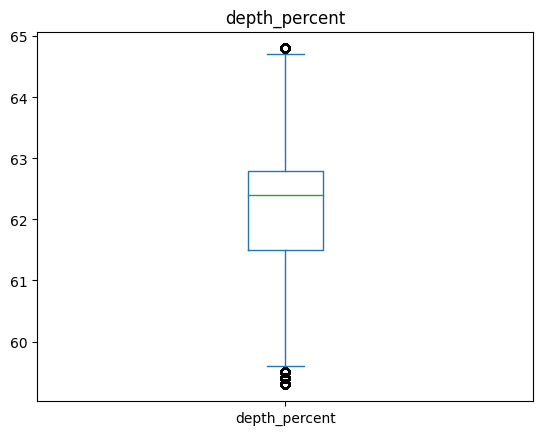

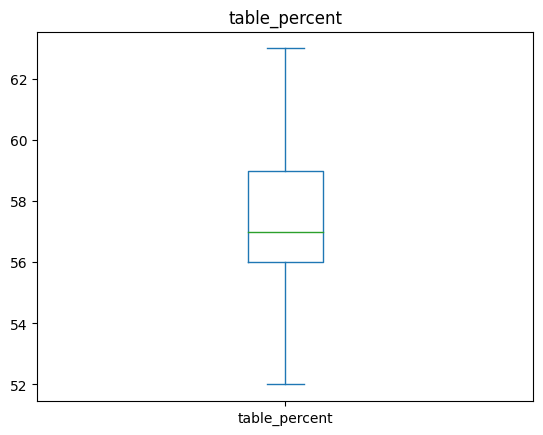

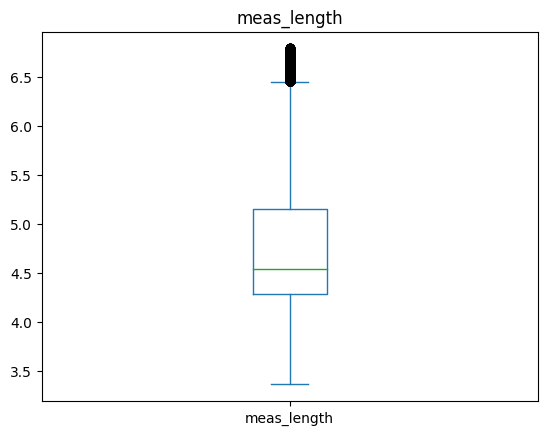

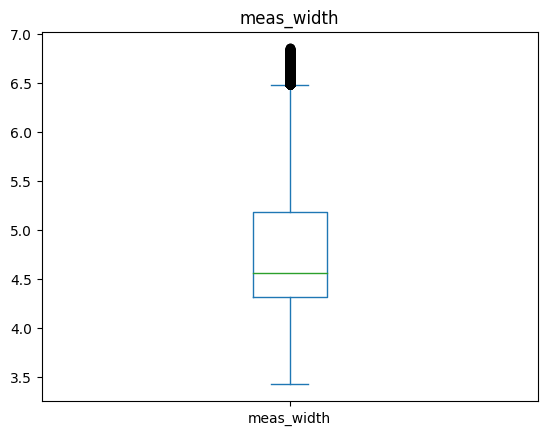

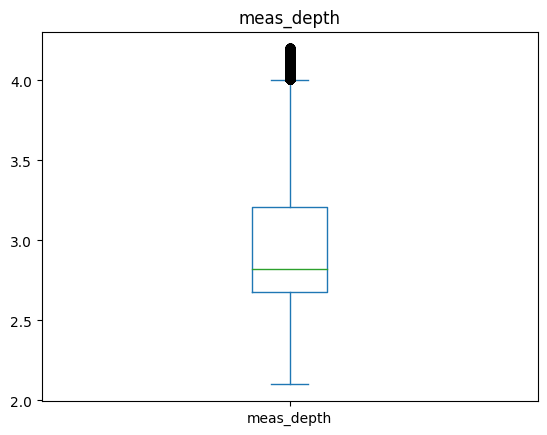

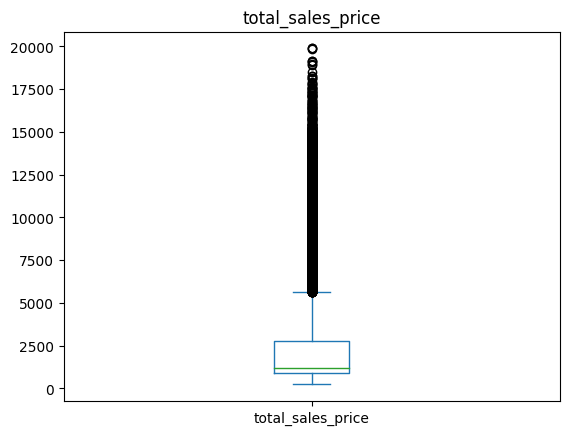

In [15]:
for column in df_not_outliers.columns[6:]:
    plt.figure()  # Создаем новое окно для каждого графика
    df_not_outliers[column].plot(kind='box', title=column)
    plt.show()

# Посмотрим на некоторые структурные ошибки в соответствие значений признаков между собой

In [16]:
df_not_outliers[df_not_outliers.meas_length > df_not_outliers.meas_width]

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price


# Корреляционная матрица

C:\Users\nikit\AppData\Local\Temp\ipykernel_1528\132104880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_not_outliers.corr()


<AxesSubplot: >

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
size,1.000000,0.075133,-0.011476,0.987284,0.987860,0.985318,0.885182
depth_percent,0.075133,1.000000,-0.517993,0.032173,0.038737,0.159575,0.008684
table_percent,-0.011476,-0.517993,1.000000,-0.004475,-0.004986,-0.069660,0.025548
meas_length,0.987284,0.032173,-0.004475,1.000000,0.999638,0.991324,0.853123
meas_width,0.987860,0.038737,-0.004986,0.999638,1.000000,0.992288,0.853292
meas_depth,0.985318,0.159575,-0.069660,0.991324,0.992288,1.000000,0.843686
total_sales_price,0.885182,0.008684,0.025548,0.853123,0.853292,0.843686,1.000000


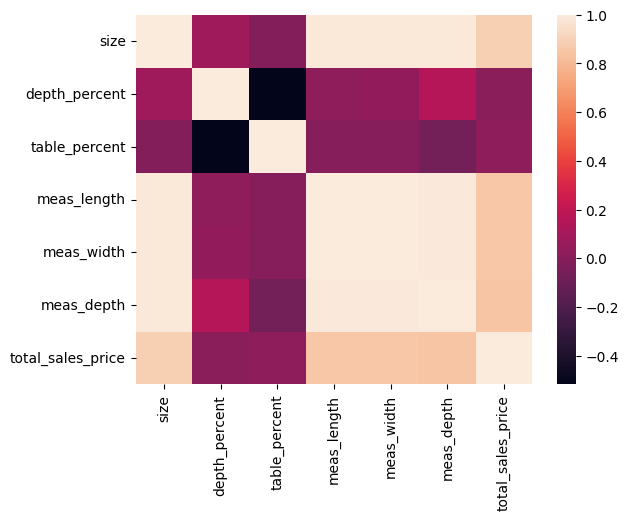

In [18]:
corr = df_not_outliers.corr()
display(sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values))

corr.style.background_gradient(cmap='coolwarm')

# ------------------------

# Tuning, fiting, find best model

In [19]:
X, y = df_not_outliers.drop(columns=['total_sales_price']), df_not_outliers['total_sales_price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.head()

,size,color,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth
41516,0.30,I,VS2,Excellent,Excellent,Excellent,62.9,56.0,4.29,4.30,2.70
65861,0.35,D,SI1,Excellent,Excellent,Excellent,60.9,57.0,4.58,4.60,2.80
37619,0.31,I,VVS2,Excellent,Excellent,Excellent,62.5,56.0,4.33,4.35,2.71
37414,0.32,K,VS1,Excellent,Excellent,Excellent,62.9,56.0,4.35,4.38,2.75
40178,0.30,F,VVS1,Excellent,Excellent,Excellent,62.1,57.0,4.30,4.31,2.68


In [23]:
axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(3,include_bias=False)),
    ('scaler', MinMaxScaler())])

missing = make_column_transformer(
    (KNNImputer(missing_values=0, n_neighbors=3, weights="uniform"), ['size', 'depth_percent', 'table_percent','meas_length','meas_width','meas_depth']),
    remainder='passthrough'
     ).set_output(transform='pandas')

axis_features = ['knnimputer__meas_length', 'knnimputer__meas_width', 'knnimputer__meas_depth']
num_features = ['knnimputer__size','knnimputer__depth_percent','knnimputer__table_percent']

ct = ColumnTransformer([
    ('pol_std', axis_transformer, axis_features),
      ('scale', StandardScaler(), num_features),
      ('onehot',
      OneHotEncoder(),
      make_column_selector(dtype_include='object'))
])

In [25]:
model_pipe_with_transformed_Y = TransformedTargetRegressor(
    regressor = Pipeline([
        ('missing', missing),
        ('preprocessing', ct),
        ('estimator', KNeighborsRegressor())
    ]),
    transformer=PowerTransformer(method='box-cox')
)

kfold = KFold(n_splits=5)

p = np.arange(1,3)
weights = ['uniform','distance']
n_neighbors = np.arange(5,7)
leafs = [5, 10]
svm = SVR()

# параметры решетки
param_grid =[ 
    {'regressor__estimator': [KNeighborsRegressor(n_jobs=-1)],
         'regressor__estimator__n_neighbors': n_neighbors,
         'regressor__estimator__p': p,
         'regressor__estimator__weights': weights,
         'regressor__estimator__leaf_size': leafs,
     'regressor__preprocessing__scale': [StandardScaler()],
     'regressor__preprocessing__pol_std__polynom__degree': [2,3]
    },
    {'regressor__estimator': [KNeighborsRegressor(n_jobs=-1)],
         'regressor__estimator__n_neighbors': n_neighbors,
         'regressor__estimator__p': p,
         'regressor__estimator__weights': weights,
         'regressor__estimator__leaf_size': leafs,
     'regressor__preprocessing__scale': [MinMaxScaler()],
     'regressor__preprocessing__pol_std__polynom__degree': [2,3]
    },
    {'regressor__estimator': [KNeighborsRegressor(n_jobs=-1)],
         'regressor__estimator__n_neighbors': n_neighbors,
         'regressor__estimator__p': p,
         'regressor__estimator__weights': weights,
         'regressor__estimator__leaf_size': leafs,
     'regressor__preprocessing__scale': [RobustScaler()],
     'regressor__preprocessing__pol_std__polynom__degree': [2,3]
    },
    {'regressor__estimator': [KNeighborsRegressor(n_jobs=-1)],
         'regressor__estimator__n_neighbors': n_neighbors,
         'regressor__estimator__p': p,
         'regressor__estimator__weights': weights,
         'regressor__estimator__leaf_size': leafs,
     'regressor__preprocessing__scale': [Normalizer()],
     'regressor__preprocessing__pol_std__polynom__degree': [2,3]
    }
]

for params in tqdm(param_grid):
    grid = GridSearchCV(model_pipe_with_transformed_Y, [params], cv = kfold, scoring='neg_mean_absolute_percentage_error', n_jobs=-1, return_train_score = True)
    grid.fit(X_train, y_train)
    display(pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

,11,27,3,19,10,26,1,17,9,25,...,14,30,5,21,13,29,4,20,12,28
mean_fit_time,0.242883,0.244986,0.244278,0.246358,0.231468,0.236065,0.268036,0.253921,0.257531,0.265486,...,0.29441,0.298465,0.276455,0.282396,0.326549,0.276866,0.25021,0.251084,0.275523,0.256748
std_fit_time,0.011448,0.012313,0.015849,0.010987,0.017886,0.01264,0.012891,0.011958,0.032982,0.036602,...,0.030891,0.034905,0.019385,0.019909,0.046452,0.018594,0.023688,0.016301,0.060897,0.027763
mean_score_time,34.77526,33.9417,33.348968,34.608091,26.468934,27.059606,30.481123,33.742838,32.65783,33.019949,...,5.224515,4.928085,5.212018,5.2524,6.366753,5.090302,4.542549,4.438302,5.137009,4.516174
std_score_time,1.887942,1.27538,1.75981,1.483819,0.159194,0.187133,6.250298,0.261253,0.273781,0.242163,...,0.523307,0.153535,0.308442,0.06325,1.036235,0.125619,0.233478,0.180843,1.088617,0.143349
param_regressor__estimator,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),...,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1)
param_regressor__estimator__leaf_size,5,10,5,10,5,10,5,10,5,10,...,5,10,5,10,5,10,5,10,5,10
param_regressor__estimator__n_neighbors,6,6,5,5,6,6,5,5,6,6,...,6,6,5,5,6,6,5,5,6,6
param_regressor__estimator__p,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
param_regressor__estimator__weights,distance,distance,distance,distance,distance,distance,uniform,uniform,uniform,uniform,...,distance,distance,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_regressor__preprocessing__pol_std__polynom__degree,3,3,3,3,2,2,3,3,3,3,...,2,2,3,3,3,3,2,2,2,2


 25%|████████████████████                                                            | 1/4 [30:22<1:31:08, 1822.68s/it]

,11,27,3,19,10,26,2,18,1,17,...,6,22,14,30,13,29,4,20,12,28
mean_fit_time,0.265023,0.266549,0.281994,0.246926,0.255853,0.236358,0.339418,0.237969,0.340779,0.281139,...,0.330654,0.280634,0.322375,0.265378,0.277921,0.272611,0.263283,0.272418,0.257267,0.244252
std_fit_time,0.012021,0.025802,0.02482,0.009843,0.026825,0.011113,0.108777,0.009196,0.208242,0.009993,...,0.095508,0.019591,0.035222,0.01209,0.016854,0.014433,0.012005,0.039447,0.009891,0.022084
mean_score_time,36.155422,34.127451,37.360125,34.943068,29.593571,27.507904,29.915482,28.400913,35.556506,34.583806,...,5.614433,5.026594,5.172228,4.875483,5.420004,5.122183,4.759894,4.58376,4.69123,4.554205
std_score_time,0.845455,0.643367,1.261698,1.301918,0.911051,0.192467,0.875558,0.595465,4.115411,0.314518,...,0.539297,0.128437,0.22314,0.097524,0.10309,0.134032,0.198895,0.249013,0.203757,0.228486
param_regressor__estimator,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),...,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1)
param_regressor__estimator__leaf_size,5,10,5,10,5,10,5,10,5,10,...,5,10,5,10,5,10,5,10,5,10
param_regressor__estimator__n_neighbors,6,6,5,5,6,6,5,5,5,5,...,5,5,6,6,6,6,5,5,6,6
param_regressor__estimator__p,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
param_regressor__estimator__weights,distance,distance,distance,distance,distance,distance,distance,distance,uniform,uniform,...,distance,distance,distance,distance,uniform,uniform,uniform,uniform,uniform,uniform
param_regressor__preprocessing__pol_std__polynom__degree,3,3,3,3,2,2,2,2,3,3,...,2,2,2,2,3,3,2,2,2,2


 50%|███████████████████████████████████████                                       | 2/4 [1:02:09<1:02:23, 1871.98s/it]

,11,27,3,19,10,26,2,18,1,17,...,14,30,5,21,13,29,4,20,12,28
mean_fit_time,0.264545,0.250835,0.256607,0.26939,0.23646,0.249754,0.241946,0.306698,0.239949,0.275231,...,0.31424,0.281511,0.286315,0.288272,0.301149,0.275894,0.252426,0.254469,0.276525,0.265474
std_fit_time,0.019639,0.011203,0.01012,0.013399,0.011912,0.024349,0.012684,0.015018,0.014517,0.018489,...,0.073245,0.008929,0.016783,0.011471,0.022942,0.013977,0.023256,0.022935,0.049204,0.047232
mean_score_time,35.182294,34.40424,34.908112,35.023386,27.326573,27.342629,27.642527,29.916431,33.189601,36.776625,...,5.212607,4.889798,5.188357,5.30279,5.285204,5.223508,4.537216,4.557576,4.691241,4.423968
std_score_time,1.388764,0.825451,1.926878,0.636354,0.185951,0.170513,0.543282,0.135164,0.384352,1.89507,...,0.195939,0.064657,0.088582,0.201224,0.197895,0.192406,0.110198,0.110417,0.166009,0.220166
param_regressor__estimator,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),...,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1)
param_regressor__estimator__leaf_size,5,10,5,10,5,10,5,10,5,10,...,5,10,5,10,5,10,5,10,5,10
param_regressor__estimator__n_neighbors,6,6,5,5,6,6,5,5,5,5,...,6,6,5,5,6,6,5,5,6,6
param_regressor__estimator__p,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
param_regressor__estimator__weights,distance,distance,distance,distance,distance,distance,distance,distance,uniform,uniform,...,distance,distance,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_regressor__preprocessing__pol_std__polynom__degree,3,3,3,3,2,2,2,2,3,3,...,2,2,3,3,3,3,2,2,2,2


 75%|████████████████████████████████████████████████████████████                    | 3/4 [1:33:18<31:10, 1870.90s/it]

,11,27,10,26,3,19,2,18,15,31,...,8,24,5,21,13,29,4,20,12,28
mean_fit_time,0.260283,0.271619,0.245075,0.230218,0.267563,0.286088,0.27924,0.252034,0.295763,0.296861,...,0.245922,0.262089,0.329767,0.317235,0.274444,0.309335,0.281232,0.270428,0.240717,0.272612
std_fit_time,0.013794,0.023085,0.011301,0.012407,0.019478,0.040732,0.069843,0.032968,0.024281,0.014039,...,0.007577,0.016808,0.021313,0.049395,0.02136,0.024983,0.057558,0.013948,0.018734,0.022284
mean_score_time,35.956436,38.396324,28.448837,27.613048,36.812043,36.773832,28.585881,29.453124,5.496101,5.312648,...,28.332421,28.508541,6.402393,5.62581,5.156752,5.448164,4.960886,4.902283,4.50882,4.993746
std_score_time,0.321616,1.51267,0.583806,0.382237,2.042891,0.645624,0.322584,1.57852,0.291357,0.134073,...,0.642849,0.66888,0.846879,0.206661,0.219376,0.098168,0.221091,0.193627,0.188571,0.219476
param_regressor__estimator,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),...,KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1),KNeighborsRegressor(n_jobs=-1)
param_regressor__estimator__leaf_size,5,10,5,10,5,10,5,10,5,10,...,5,10,5,10,5,10,5,10,5,10
param_regressor__estimator__n_neighbors,6,6,6,6,5,5,5,5,6,6,...,6,6,5,5,6,6,5,5,6,6
param_regressor__estimator__p,1,1,1,1,1,1,1,1,2,2,...,1,1,2,2,2,2,2,2,2,2
param_regressor__estimator__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_regressor__preprocessing__pol_std__polynom__degree,3,3,2,2,3,3,2,2,3,3,...,2,2,3,3,3,3,2,2,2,2


100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [2:05:26<00:00, 1881.67s/it]


# Выбираем лучшую модель и смотрим ее score на всем тестовом наборе

In [70]:
axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(3,include_bias=False)),
    ('scaler', MinMaxScaler())])

missing = make_column_transformer(
    (KNNImputer(missing_values=0, n_neighbors=3, weights="uniform"), ['size', 'depth_percent', 'table_percent', 'meas_length','meas_width','meas_depth']),
    remainder='passthrough'
     ).set_output(transform='pandas')

axis_features = ['knnimputer__meas_length', 'knnimputer__meas_width', 'knnimputer__meas_depth']
num_features = ['knnimputer__size','knnimputer__depth_percent','knnimputer__table_percent']
ct = ColumnTransformer([
    ("pol_std", axis_transformer, axis_features),
      ('scale', Normalizer(), num_features),
      ('onehot',
      OneHotEncoder(),
      make_column_selector(dtype_include='object'))
])


model_pipe_with_transformed_Y = TransformedTargetRegressor(
    regressor = Pipeline([
        ('missing', missing),
        ('preprocessing', ct),
        ('estimator', KNeighborsRegressor(n_neighbors=6, p=2, leaf_size=5, weights='distance'))
    ]),
    transformer=PowerTransformer(method='box-cox')
)

In [71]:
model_pipe_with_transformed_Y.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('missing',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('knnimputer',
                                                                                       KNNImputer(missing_values=0,
                                                                                                  n_neighbors=3),
                                                                                       ['size',
                                                                                        'depth_percent',
                                                                                        'table_percent',
                                                                                        'meas_length',
                                                                                        'meas_width',
                                                                                        'meas_depth'])])),
                                                     ('preprocessing',
                                                      ColumnTransformer(transformers=[('pol_std',
                                                                                       Pipeline(steps=[('polynom',
                                                                                                        P...
                                                                                        'knnimputer__meas_depth']),
                                                                                      ('scale',
                                                                                       Normalizer(),
                                                                                       ['knnimputer__size',
                                                                                        'knnimputer__depth_percent',
                                                                                        'knnimputer__table_percent']),
                                                                                      ('onehot',
                                                                                       OneHotEncoder(),
                                                                                       <sklearn.compose._column_transformer.make_column_selector object at 0x0000029ADFD16EE0>)])),
                                                     ('estimator',
                                                      KNeighborsRegressor(leaf_size=5,
                                                                          n_neighbors=6,
                                                                          weights='distance'))]),
                           transformer=PowerTransformer(method='box-cox'))

In [72]:
y_pred_train = model_pipe_with_transformed_Y.predict(X_test)
y_pred_train

array([ 1592.4549214 ,  3396.86377889,  1038.49879565, ...,
         993.11909117, 12408.04678036,  1374.51709752])

In [73]:
mean_absolute_percentage_error(y_test, y_pred_train)

0.08301654215263231

In [74]:
def plot_2_error(y_true, y_pred):

    mape = mean_absolute_percentage_error(y_true, y_pred) * 100


    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label='Scatter Plot')
    plt.title('Scatter Plot of Predicted vs. True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)


    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prediction Line')


    plt.legend()
    print(f'MAPE: {mape:.2f}%')


    plt.show()

MAPE: 8.30%


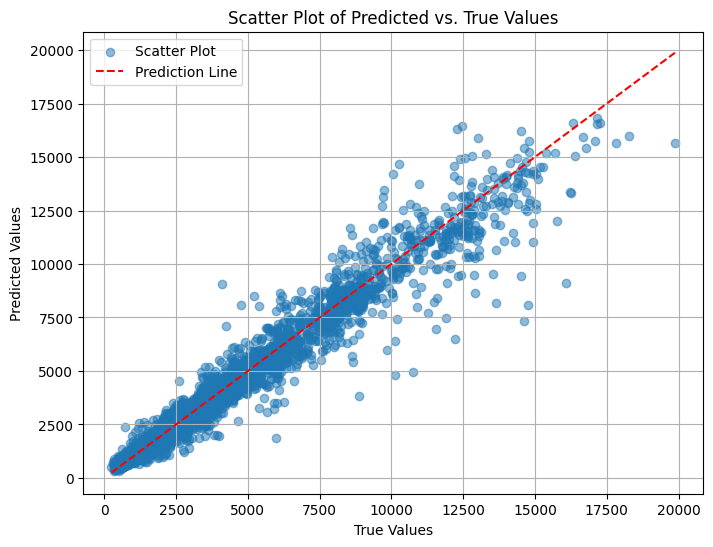

In [75]:
plot_2_error(y_test, y_pred_train)

### Так как в той или иной мере была "подгонка" под определенный (рандомный) seed (при разбиении на X_train и X_test) посмотрим какой score мы имеем в среднем у нашей лучшей модели

In [76]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model_pipe_with_transformed_Y.fit(X_train, y_train)
    y_pred_train = model_pipe_with_transformed_Y.predict(X_test)
    scores.append(mean_absolute_percentage_error(y_test, y_pred_train))

print(np.mean(scores))

0.08270269661424914


In [77]:
display(min(scores))
display(max(scores))

0.08051046104132642

0.08462494272791378